## Foreground Removal with PCA
This notebook runs PCA on the simulated data. The code written here to estimate the foregrounds was then written in functions which are available in PCA.py. This notebook uses the same method as these functions and clearly shows how the process of PCA was applied to the data to produce the foreground estimates. 

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

In [61]:
### LOAD IN THE DATA ###
T_HI = np.load('MultiDarkSims/dT_HI.npy')    #HI intensity map
T_FG = np.load('MultiDarkSims/dT_FG.npy')     #foreground map
nx,ny,nz = np.shape(T_HI)

In [62]:
### COMBINE SIMULATED FOREGROUNDS AND SIGNAL ###
T_ALL = T_HI + T_FG
N = 3                #set number of principal components to consider for foreground

In [63]:
B = np.zeros([nz,N])    #construct selection matrix
for i in range(nz): 
    for j in range(N): 
        if i == j: 
            B[i,j] = 1

In [64]:
### RESHAPE THE DATA AND SWAP AXES ###
axes = np.shape(data_array)
data = np.reshape(data_array,(axes[0]*axes[1],axes[2]))     #reshape data so long 1d array of pixels for each z
data = np.swapaxes(data,0,1)                                #swap axes so that data in form Nz, Npix

In [65]:
### MEAN CENTRE EACH FREQUENCY MAP ### 
for i in range(nz):
    data[i] = data[i] - np.mean(data[i])

### APPLY PCA TO THE DATA
##### This code applies PCA according to the following method: <br/>
1) Find the covariance matrix of the data <br/>
2) Find eigenvalues and vectors of covariance matrix <br/>
3) Construct the mixing matrix, A, by multiplying the eigenvector matrix with the 'selection matrix', whichs selects the eigenvectors associated with components to construct the foreground estimate. <br/>
4) Find the eigen-sources, S, i.e. the projection of the components we want to estimate the foreground with, by multpling the transpose of the mixing matrix with the data. <br/>
5) Finally, construct the foreground matrix by multiplying the mixing matrix and eigensources together. <br/>

In [66]:
cov = np.cov(data)                         #find covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov)    #find eigenvalues and vectors of covariance matrix

A = np.matmul(eig_vecs, B)          #construct mixing matrix
A_trans = A.transpose()  

S = np.matmul(A_trans,data)         #find eigensources #mixing matrix projected onto data

In [67]:
### REMOVE FOREGROUND FROM DATA ###
FG_est = np.matmul(A,S)      #estimate foreground

FG_est = np.swapaxes(FG_est,0,1)
FG_est = FG_est.reshape([nx,ny,nz]) 

clean = data_array - FG_est  #subtract foreground from data

### PLOT THE FOREGROUND ESTIMATES AND CLEANED DATA

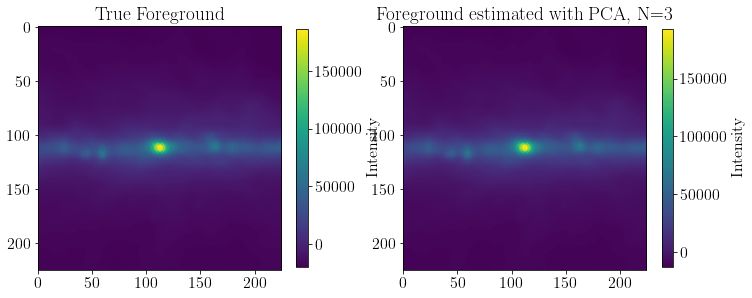

In [69]:
### PLOT TRUE AND ESTIMATED FOREGROUNDS ###
n = 0 #index of map to be plotted from data cube
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.2)

#plot HI intensity map 
dT_FG = T_FG - np.mean(T_FG)
plt.subplot(121)
plt.imshow(dT_FG[:,:,n])
plt.title("True Foreground") #mean centre the foregrounds so that these comparisons are more fair
plt.colorbar(label = "Intensity", shrink = 0.73)

#plot HI intenisty map with foreground
plt.subplot(122)
plt.imshow(FG_est[:,:,n])
plt.title("Foreground estimated with PCA, N="+str(N))
plt.colorbar(label="Intensity", shrink = 0.73)

#plt.savefig("plots/test.png")                  #change filename

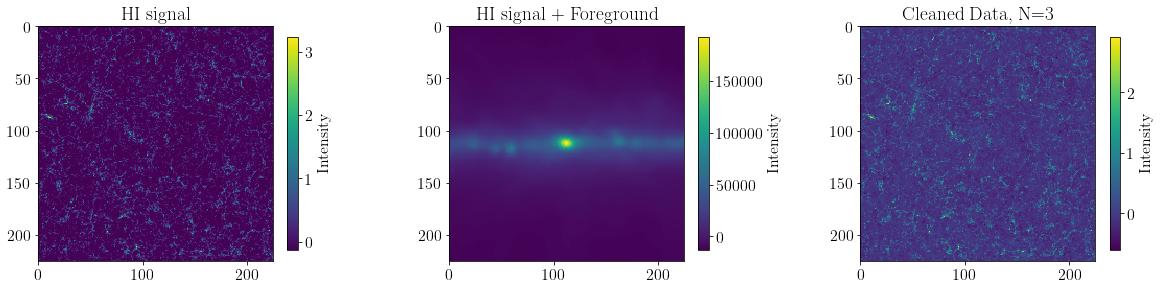

In [75]:
### PLOT HI SIGNAL, SIGNAL + DATA AND CLEANED DATA ###

n = 0 #index of map to be plotted from data cube
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(wspace=0.4)

#plot HI intensity map 
plt.subplot(131)
plt.imshow(T_HI[:,:,n])
plt.title("HI signal")
plt.colorbar(label = "Intensity", shrink = 0.49)

#plot HI intenisty map with foreground
plt.subplot(132)
plt.imshow(data_array[:,:,n])
plt.title("HI signal + Foreground")
plt.colorbar(label="Intensity", shrink = 0.49)

#plot cleaned data
plt.subplot(133)
plt.imshow(clean[:,:,n])
plt.title("Cleaned Data, N="+ str(N))
plt.colorbar(label = "Intensity", shrink = 0.49)


plt.savefig("plots/PCA-N="+str(N)+".png")                       #change filename